In [40]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [41]:
cust = pd.read_csv("Blackwell_Hist_Sample.csv")

In [42]:
cust.describe()

,in.store,age,items,amount,region
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.455500,45.956500,4.50390,835.000181,2.659700
std,0.498041,15.902261,2.06611,723.099002,1.128904
min,0.000000,18.000000,1.00000,5.230000,1.000000
25%,0.000000,33.000000,3.00000,276.752500,2.000000
50%,0.000000,45.000000,4.00000,570.665000,3.000000
75%,1.000000,57.000000,6.00000,1249.900000,4.000000
max,1.000000,85.000000,8.00000,2999.200000,4.000000


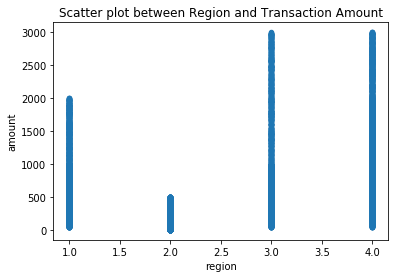

In [43]:
# Region to amount relation
cust.plot.scatter(x='region', y='amount', title= "Scatter plot between Region and Transaction Amount");
plt.show(block=True);

The plot sbove shows that customers in Region 2 spend the least and those in Region 3/4 spend the most

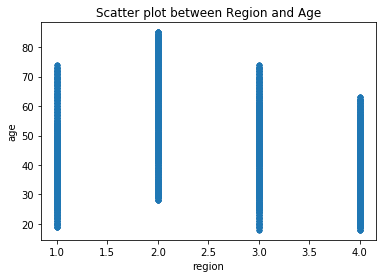

In [44]:
# Region to age relation
cust.plot.scatter(x='region', y='age', title= "Scatter plot between Region and Age");
plt.show(block=True);

Region 2 has the oldest buyers and region 4 the youngest

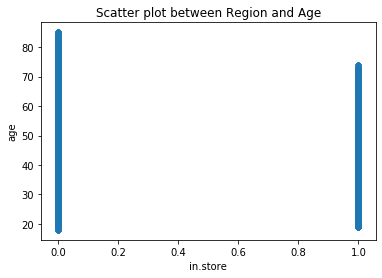

In [45]:
# in-store to age relation
cust.plot.scatter(x='in.store', y='age', title= "Scatter plot between Region and Age");
plt.show(block=True);

The oldest customers buy online. Perhaps, we can find what factors predict if someone will buy online

In [22]:
# build decision tree to predict if transactions online or instore
# split dataset in features and target variable
feature_cols = ['age', 'items', 'amount','region']
X = cust[feature_cols] # Features
y = cust['in.store'] # Target variable

In [23]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7983333333333333


In [ ]:
# Kappa - measuring reliability, with 1 tending to good and 0 to bad

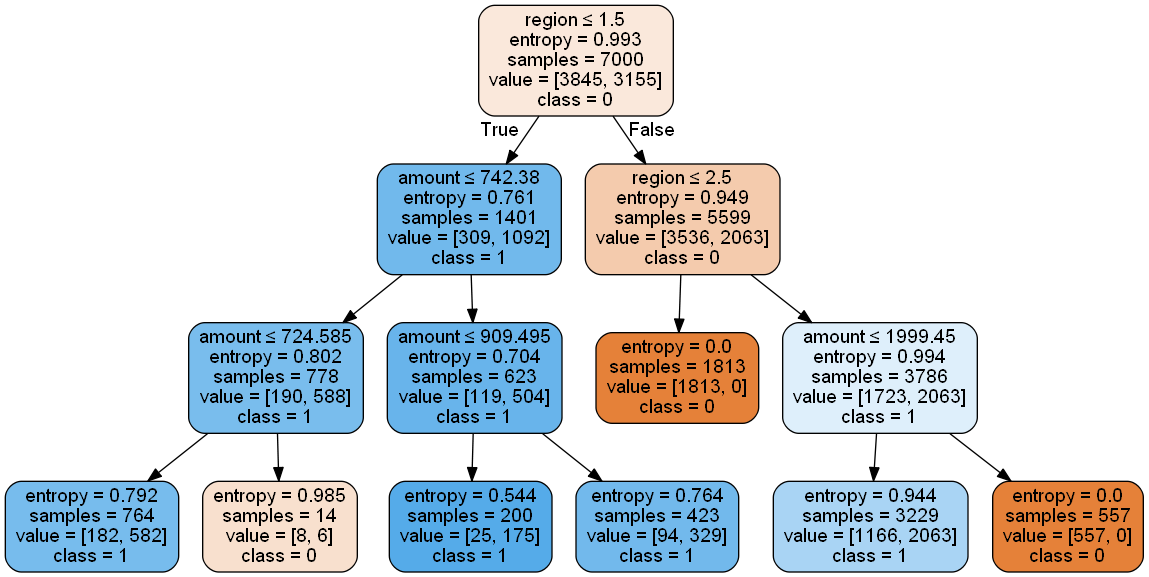

In [26]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('region.png')
Image(graph.create_png())

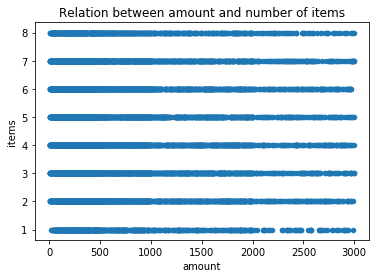

In [27]:
# any discernable relation bwteen transactions amount and items? No
cust.plot.scatter(x='amount',y='items',title='Relation between amount and number of items')
plt.show()

In [36]:
# build decision tree to predict if transactions amount and items are related
feature_cols = ['age', 'in.store', 'amount','region']
X = cust[feature_cols] # Features
y = cust['items'] # Target variable

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [38]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.142


Note that with neither vizualization nor Decision trees can we predict the number of items from amount with any success